In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [ ]:
%matplotlib inline

sns.set(style="darkgrid")

## Данный датасет взят с открытой платформы Kaggle. Оригинальная задача заключается в предсказании длительности поездки на такси в Нью-Йорке.

https://www.kaggle.com/c/nyc-taxi-trip-duration/overview

In [ ]:
df = pd.read_csv('train.csv')

## Для начала немного дополним таблицу удобными для дальшейшего анализа столбцами, а именно: месяц поездки, день месяца, день в году, часы суток.

In [ ]:
df['drive_month'] = df['pickup_datetime'].str[5:7].astype(int)
df['drive_day_of_month'] = df['pickup_datetime'].str[8:10].astype(int)
df['drive_day'] = df['pickup_datetime'].str[0:10]
df['drive_time'] = (60*24*df['pickup_datetime'].str[11:13].astype(int) + 60*df['pickup_datetime'].str[14:16].astype(int) + df['pickup_datetime'].str[17:].astype(int))
df['drive_h'] = df['pickup_datetime'].str[11:13].astype(int)

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,drive_month,drive_day_of_month,drive_day,drive_time,drive_h
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,14,2016-03-14,25975,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,12,2016-06-12,2615,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,19,2016-01-19,17964,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,6,2016-04-06,29311,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,26,2016-03-26,20575,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,8,2016-04-08,20584,13
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,10,2016-01-10,12195,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,22,2016-04-22,12101,6
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,5,2016-01-05,24986,15


# Можно увидеть, что в течение всех 6-ти месяцев заказ такси был примерно равномерен, кроме одного участка - 20-ые числа января 2016 года. Посмотрим, что произошло в эти дни

### *Длительная снежная буря на северо-востоке США унесла жизни 28 человек, были обесточены дома, в Вашингтоне не работали государственные учреждения* (25 Января 2016 года)

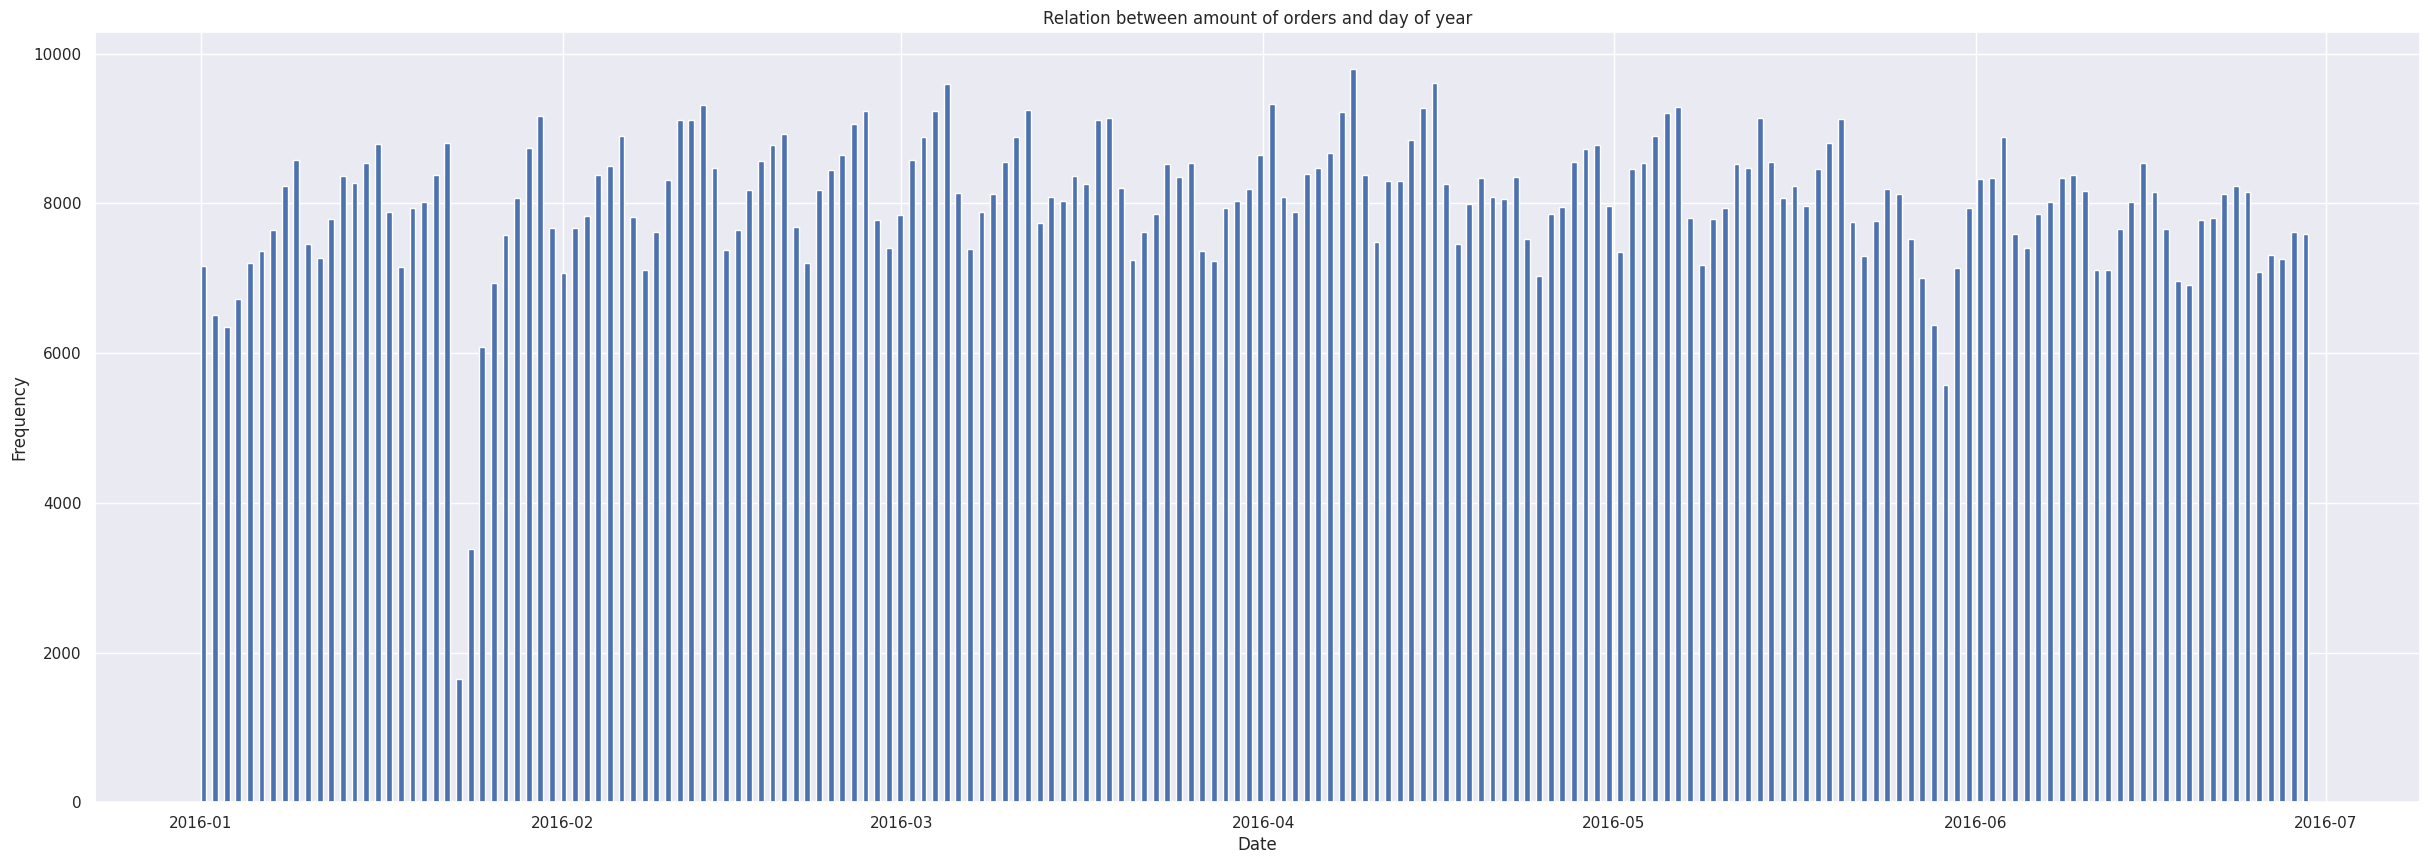

In [ ]:
df['drive_day'] = pd.to_datetime(df['drive_day'])
plt.figure(figsize=(30, 10))
plt.hist(df['drive_day'], bins=len(df['drive_day'].unique()), width=0.5)
plt.title("Relation between amount of orders and day of year")
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

# Можем подтвердить очевидное: частота заказа начинает резко расти где-то на 8 утра (когда все едут на работу), держится весь день, час-пик - 9 часов вечера, когда все едут домой или отдыхать.

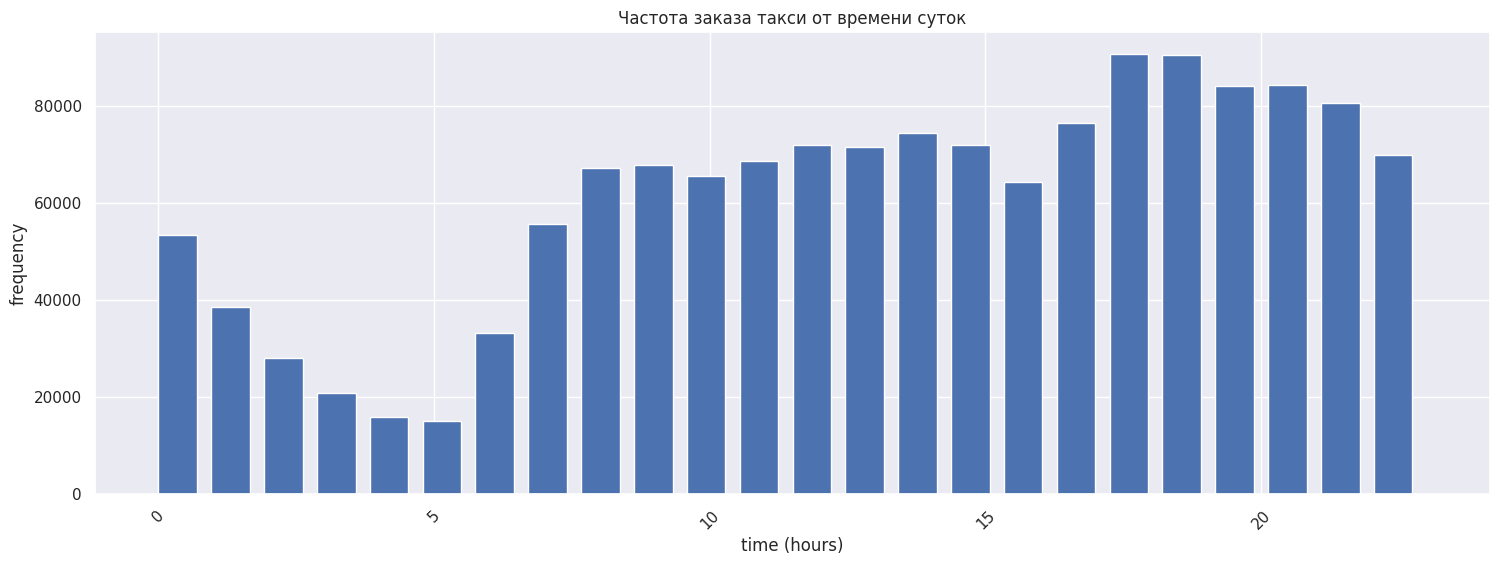

In [ ]:
plt.figure(figsize=(18,6))
plt.hist(df['drive_h'].sort_values(), width=0.7, bins=len(df['drive_h'].unique()))
plt.xticks(rotation=45)
plt.title("Частота заказа такси от времени суток")
plt.xlabel("time (hours)")
plt.ylabel("frequency")
plt.show()

In [ ]:
df["distance"] = 111 * np.sqrt(np.square(df['pickup_longitude'] - df['dropoff_longitude']) + np.square(df['pickup_latitude'] - df['dropoff_latitude']))
df["id"] = df["id"].str[2:]

In [ ]:
usable_df = df.loc[:, ["trip_duration", "distance"]]


## Заметим, что дистанция и время не линейно завистят. Можно сделать предположение, что больше решает время и маршрут нежели дистанция.

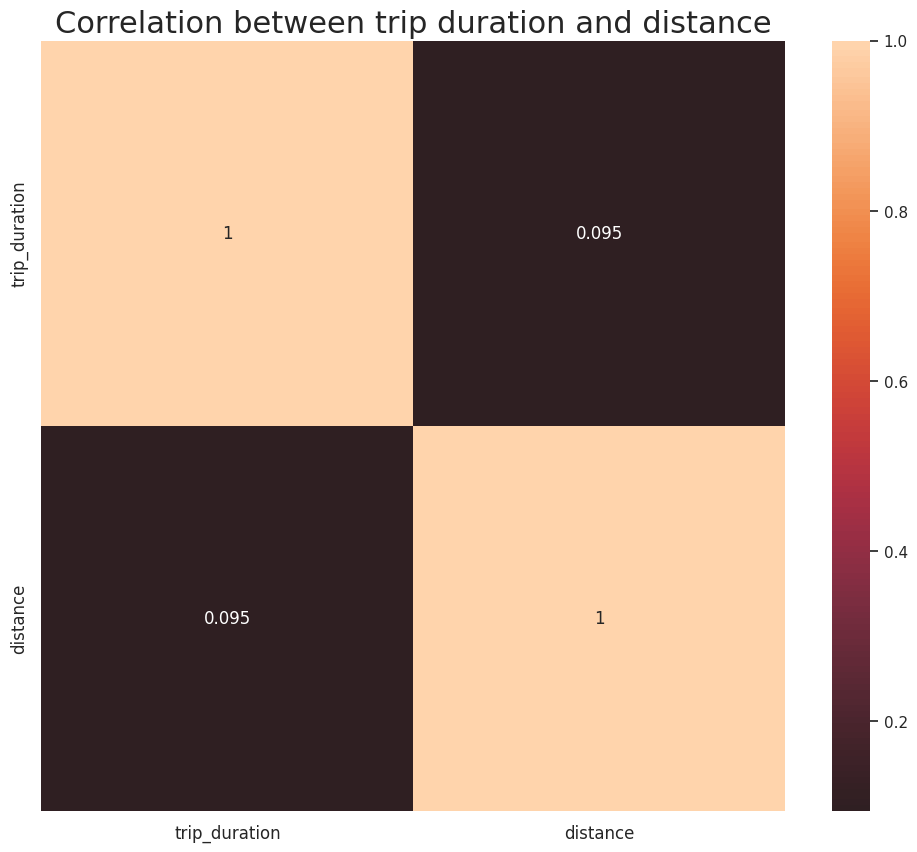

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(usable_df.corr(), xticklabels=usable_df.corr().columns, yticklabels=usable_df.corr().columns, center=0, annot=True)
plt.title('Correlation between trip duration and distance', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
new_df = df.loc[:, ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'drive_h']]


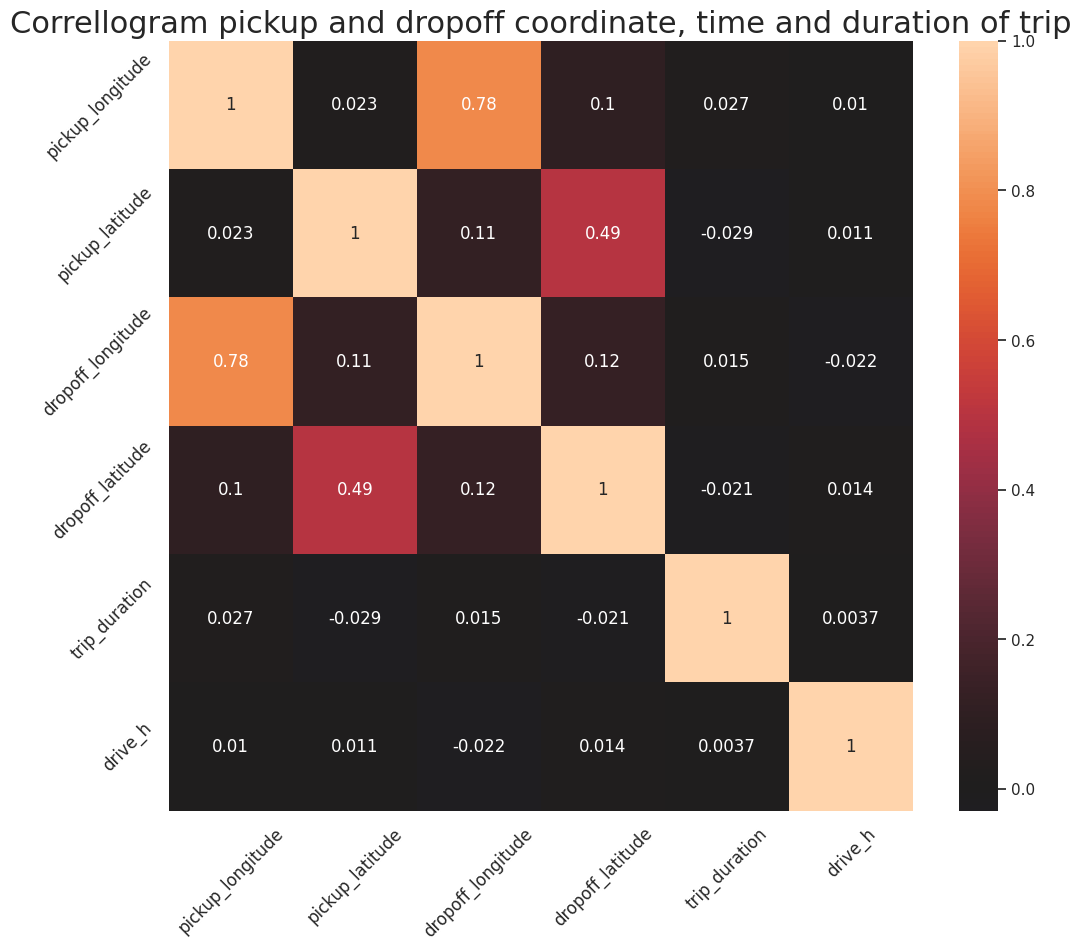

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(new_df.corr(), xticklabels=new_df.corr().columns, yticklabels=new_df.corr().columns, center=0, annot=True)
plt.title('Correllogram pickup and dropoff coordinate, time and duration of trip', fontsize=22)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.show()

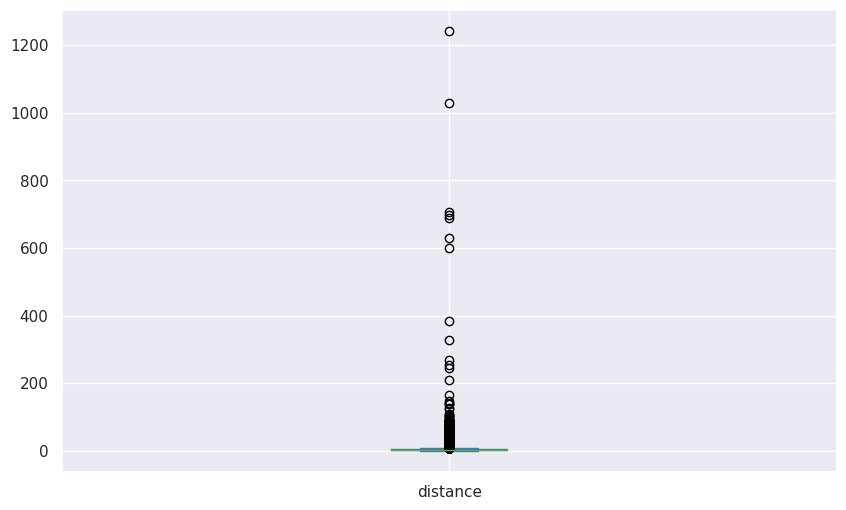

In [ ]:
plt.figure(figsize=(10,6))
usable_df['distance'].plot(kind='box')
plt.show()

## Средняя длина пути - 2,4км

In [ ]:
Q2 = usable_df['distance'].quantile(0.5)
print(Q2)

2.3550550255849094


In [ ]:

Q1 = usable_df['distance'].quantile(0.25)
Q3 = usable_df['distance'].quantile(0.75)
IQR = Q3 - Q1

smth = df[(usable_df['distance'] < Q1 - 1.5 * IQR)| (usable_df['distance'] > Q3 + 1.5 * IQR)]
smth

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,drive_month,drive_day_of_month,drive_day,drive_time,drive_h,distance
24,3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,6,3,2016-06-03,12425,8,23.837913
29,1410897,1,2016-03-23 14:10:39,2016-03-23 14:49:30,1,-73.982117,40.756351,-73.865692,40.770988,N,2331,3,23,2016-03-23,20799,14,13.024856
33,0023813,1,2016-04-17 14:38:30,2016-04-17 15:16:19,1,-73.990311,40.756580,-73.870918,40.773930,N,2269,4,17,2016-04-17,22470,14,13.391744
50,2067879,2,2016-01-19 23:19:01,2016-01-19 23:44:58,1,-73.996819,40.752861,-73.809006,40.816875,N,1557,1,19,2016-01-19,34261,23,22.024900
54,0526266,2,2016-05-15 09:42:58,2016-05-15 09:56:37,1,-73.934883,40.801010,-73.983002,40.722569,N,819,5,15,2016-05-15,15538,9,10.214706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458563,2913513,2,2016-04-20 12:27:05,2016-04-20 13:06:45,5,-73.872917,40.774212,-73.982094,40.774651,N,2380,4,20,2016-04-20,18905,12,12.118704
1458571,1440046,1,2016-06-26 22:59:48,2016-06-26 23:40:42,2,-73.778946,40.647343,-73.952103,40.781166,N,2454,6,26,2016-06-26,35268,22,24.291497
1458584,1607338,2,2016-06-14 20:37:11,2016-06-14 21:16:06,1,-73.786697,40.641628,-73.996880,40.732506,N,2335,6,14,2016-06-14,31031,20,25.417613
1458589,2071901,1,2016-06-10 16:48:20,2016-06-10 17:23:13,2,-73.782280,40.644783,-73.904305,40.738285,N,2093,6,10,2016-06-10,25940,16,17.063924


In [ ]:
print(usable_df.shape[0])
print(smth.shape[0])
print(f"{round(smth.shape[0]/usable_df.shape[0]*100, 2)}%")

1458644
145524
9.98%


## Какое количество выборосов по расстоянию относительно количества всех заказов

In [ ]:
df['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,1450599
Y,8045


## Количество неполадок с сетью очень мало относительно количества всех заказов, скорее случайность, нежели закономерность

In [ ]:
SnF_df = df.loc[:, ['vendor_id', 'store_and_fwd_flag', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
SnF_df['start_coord'] = 111 * np.sqrt(np.square(df['pickup_longitude']) + np.square(df['pickup_latitude']))
SnF_df['end_coord'] = 111 * np.sqrt(np.square(df['dropoff_longitude']) + np.square(df['dropoff_latitude']))
SnF_df

,vendor_id,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,start_coord,end_coord
0,2,N,-73.982155,40.767937,-73.964630,40.765602,9376.303377,9374.474640
1,1,N,-73.980415,40.738564,-73.999481,40.731152,9374.561113,9376.018241
2,2,N,-73.979027,40.763939,-74.005333,40.710087,9375.785113,9375.460092
3,2,N,-74.010040,40.719971,-74.012268,40.706718,9376.446725,9375.954391
4,2,N,-73.973053,40.793209,-73.972923,40.782520,9376.772861,9376.187372
...,...,...,...,...,...,...,...,...
1458639,2,N,-73.982201,40.745522,-73.994911,40.740170,9375.107269,9376.056592
1458640,1,N,-74.000946,40.747379,-73.970184,40.796547,9377.029390,9376.672956
1458641,2,N,-73.959129,40.768799,-74.004433,40.707371,9374.111188,9375.227228
1458642,1,N,-73.982079,40.749062,-73.974632,40.757107,9375.284972,9374.991904


## Посмотрим медиану координат старта и конца, там где были проблемы со связью

In [ ]:
Connect_df = df[df['store_and_fwd_flag'] == "Y"].loc[:, ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

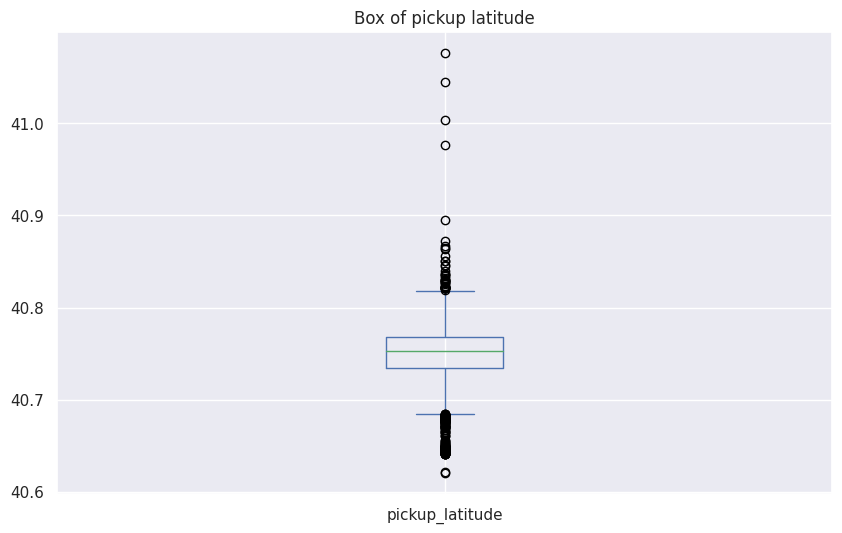

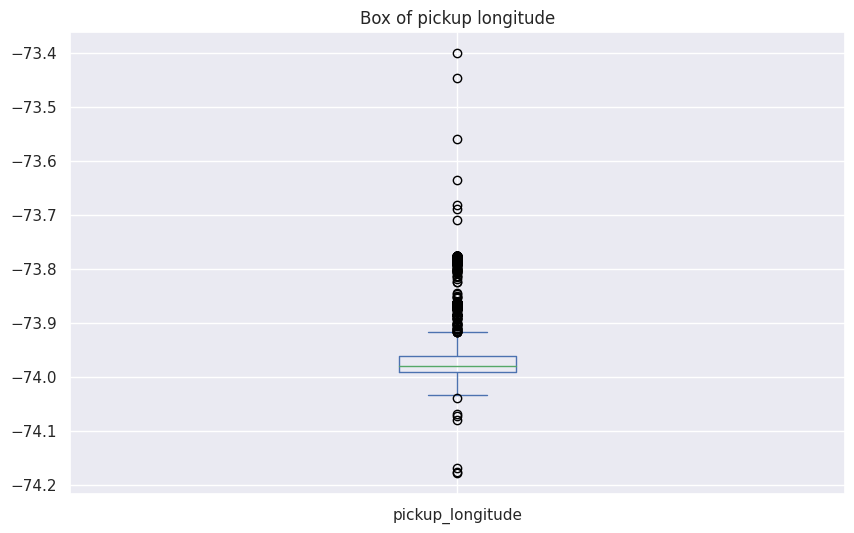

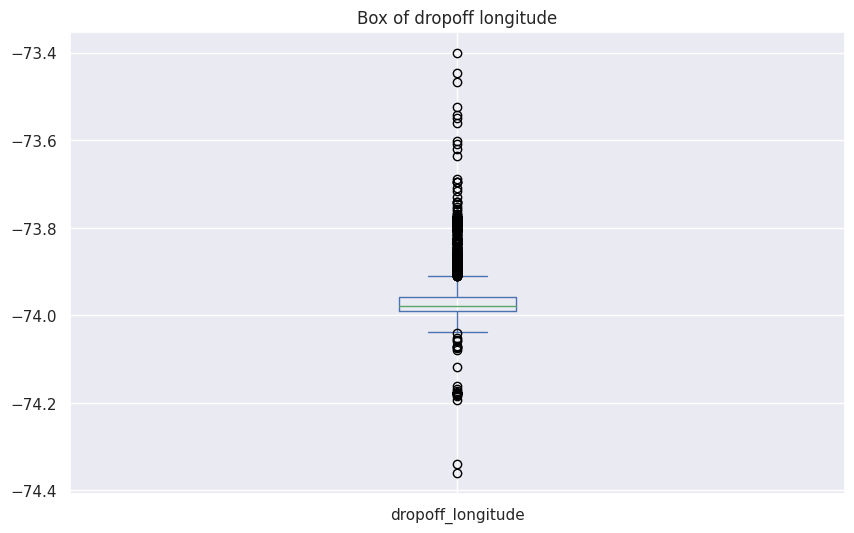

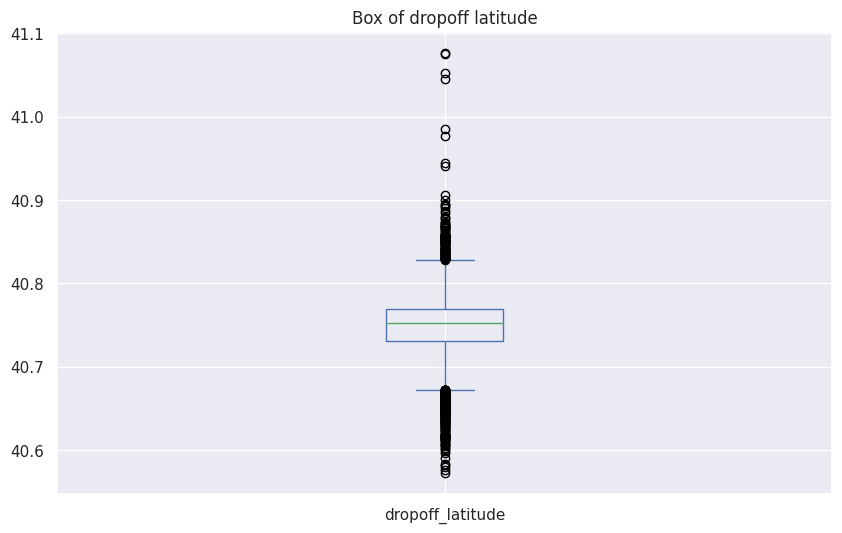

In [ ]:
plt.figure(figsize=(10, 6))
Connect_df['pickup_latitude'].plot(kind='box')
plt.title("Box of pickup latitude")
plt.show()

plt.figure(figsize=(10, 6))
Connect_df['pickup_longitude'].plot(kind='box')
plt.title("Box of pickup longitude")
plt.show()

plt.figure(figsize=(10, 6))
Connect_df['dropoff_longitude'].plot(kind='box')
plt.title("Box of dropoff longitude")
plt.show()

plt.figure(figsize=(10, 6))
Connect_df['dropoff_latitude'].plot(kind='box')
plt.title("Box of dropoff latitude")
plt.show()

## Здесь тоже непонятно почему так, очень много выбросов, т.е. проблемы со связью скорее не связаны с координатами

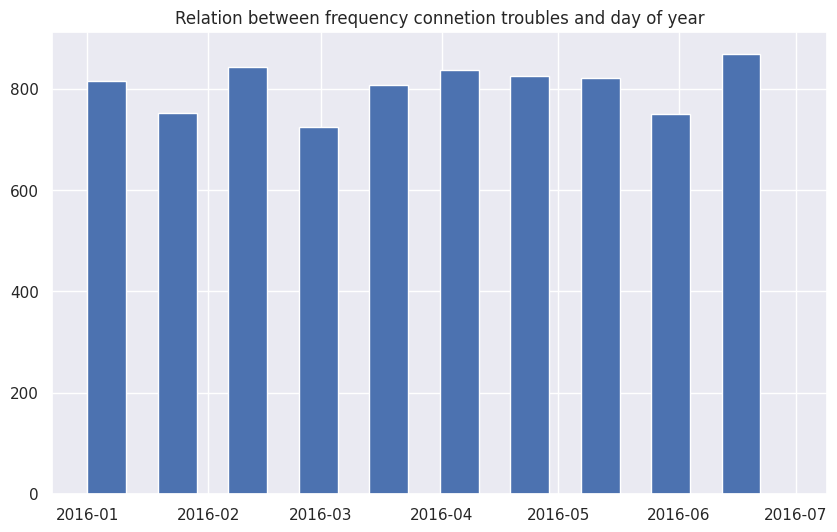

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['store_and_fwd_flag'] == "Y"]['drive_day'].sort_values(), width=10)
plt.title("Relation between frequency connetion troubles and day of year")
plt.show()

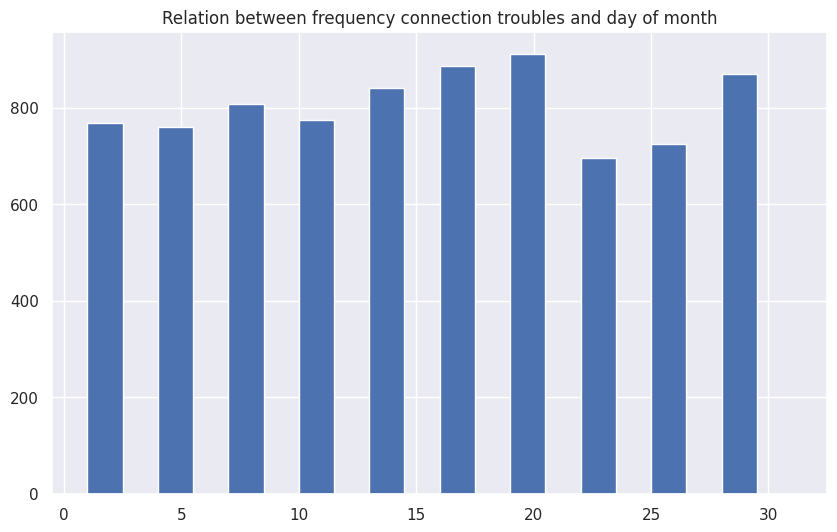

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['store_and_fwd_flag'] == "Y"]['drive_day_of_month'], width = 1.5)
plt.title("Relation between frequency connection troubles and day of month")
plt.show()

## В часы пик количество сбоев выше, поскольку в целом заказов больше, опять никакой зависимости

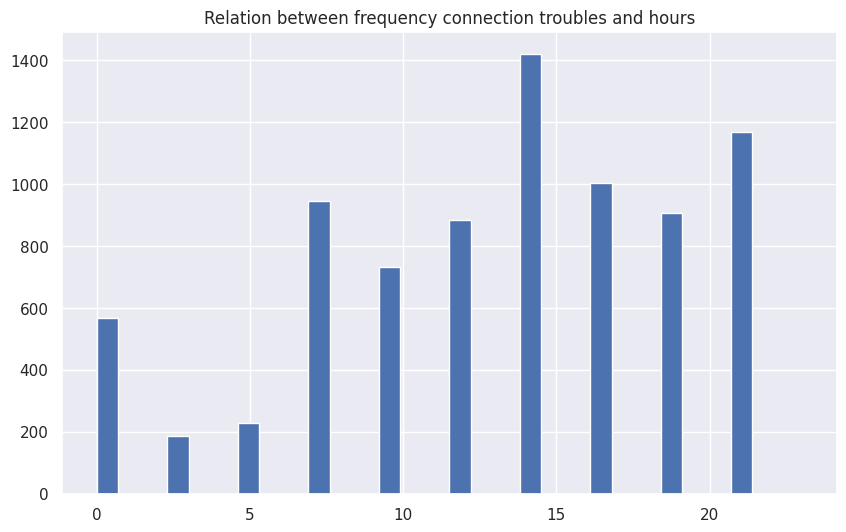

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['store_and_fwd_flag'] == "Y"]['drive_h'], width = 0.7)
plt.title("Relation between frequency connection troubles and hours")
plt.show()

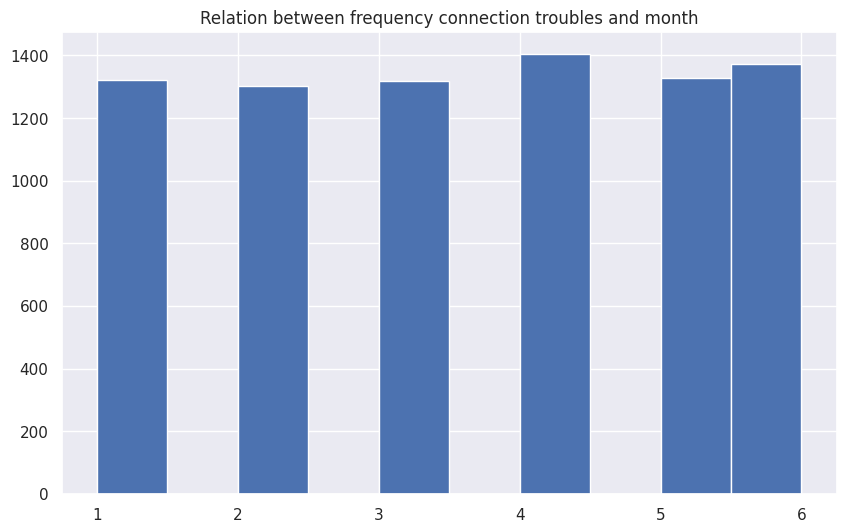

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['store_and_fwd_flag'] == "Y"]['drive_month'], width = 0.5)
plt.title("Relation between frequency connection troubles and month")
plt.show()

In [ ]:
Q2_N_St = SnF_df[SnF_df['store_and_fwd_flag'] == 'N']['start_coord'].quantile(0.5)
Q2_Y_St = SnF_df[SnF_df['store_and_fwd_flag'] == 'Y']['start_coord'].quantile(0.5)
Q2_N_End = SnF_df[SnF_df['store_and_fwd_flag'] == 'N']['end_coord'].quantile(0.5)
Q2_Y_End = SnF_df[SnF_df['store_and_fwd_flag'] == 'Y']['end_coord'].quantile(0.5)
print(abs(Q2_N_St - Q2_Y_St))
print(abs(Q2_N_End - Q2_Y_End))

0.07986347757650947
0.1480808111064107


## Флажок есть связь или нет не связан со стартом или концом маршрута. Скорее всего свзяно в целом со связью конкретного водителя, проверим это

In [ ]:
repl = {'N': 0, 'Y': 1}
SnF_df['store_and_fwd_flag'] = SnF_df['store_and_fwd_flag'].replace(repl)
SnF_df

<ipython-input-26-726d8a1a10e0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SnF_df['store_and_fwd_flag'] = SnF_df['store_and_fwd_flag'].replace(repl)


,vendor_id,store_and_fwd_flag,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,start_coord,end_coord
0,2,0,-73.982155,40.767937,-73.964630,40.765602,9376.303377,9374.474640
1,1,0,-73.980415,40.738564,-73.999481,40.731152,9374.561113,9376.018241
2,2,0,-73.979027,40.763939,-74.005333,40.710087,9375.785113,9375.460092
3,2,0,-74.010040,40.719971,-74.012268,40.706718,9376.446725,9375.954391
4,2,0,-73.973053,40.793209,-73.972923,40.782520,9376.772861,9376.187372
...,...,...,...,...,...,...,...,...
1458639,2,0,-73.982201,40.745522,-73.994911,40.740170,9375.107269,9376.056592
1458640,1,0,-74.000946,40.747379,-73.970184,40.796547,9377.029390,9376.672956
1458641,2,0,-73.959129,40.768799,-74.004433,40.707371,9374.111188,9375.227228
1458642,1,0,-73.982079,40.749062,-73.974632,40.757107,9375.284972,9374.991904


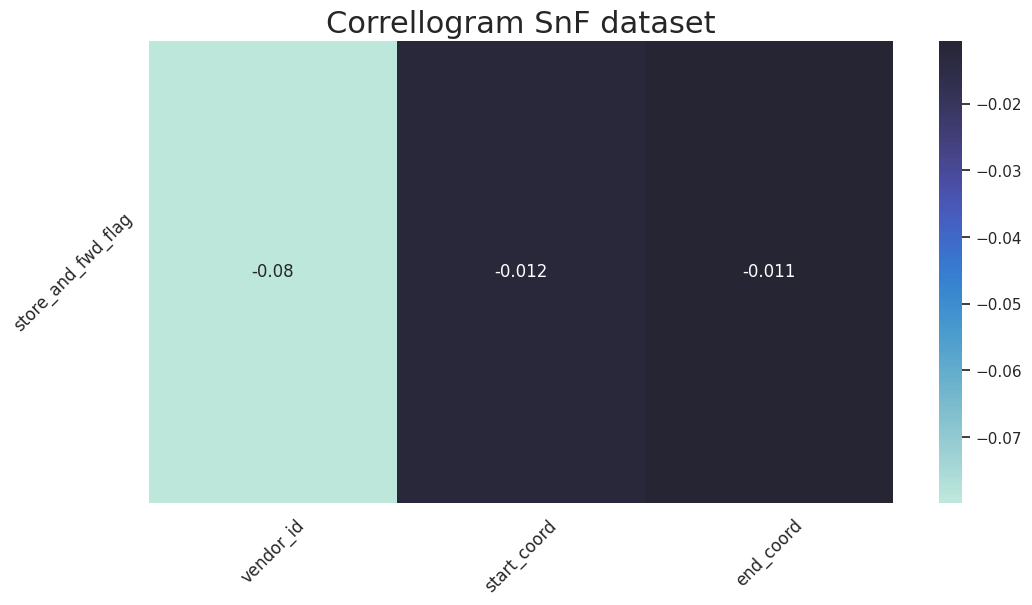

In [ ]:
SnF_df_ed = SnF_df.loc[:, ['vendor_id', 'store_and_fwd_flag', 'start_coord', 'end_coord']]
SnF_df_corr = SnF_df_ed.corr().loc[["store_and_fwd_flag"], ["vendor_id", "start_coord", "end_coord"]]
plt.figure(figsize=(12,6))
sns.heatmap(SnF_df_corr, xticklabels=SnF_df_corr.columns, yticklabels=["store_and_fwd_flag"], center=0, annot=True)
plt.title('Correllogram SnF dataset', fontsize=22)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.show()

# Видим, что все помехи в связи лишь от одного приложения (хотя их всего два), так что скорее просто рандомные независящие не от чего ситуации

In [ ]:
print(df[df['store_and_fwd_flag'] == "Y"]['vendor_id'].value_counts())
print(df[df['store_and_fwd_flag'] == "N"]['vendor_id'].value_counts())

vendor_id
1    8045
Name: count, dtype: int64
vendor_id
2    780302
1    670297
Name: count, dtype: int64


## Можно также заметить, что количество заказов из первого и второго приложения примерно одинаковые (хотя и может, что датасет так составлен)

In [ ]:
df[df['store_and_fwd_flag'] == "Y"]['pickup_longitude']

,pickup_longitude
348,-73.977905
491,-73.978981
610,-73.988510
774,-73.948982
846,-73.982628
...,...
1457556,-73.874535
1457670,-73.781944
1457897,-73.990097
1458060,-73.971008


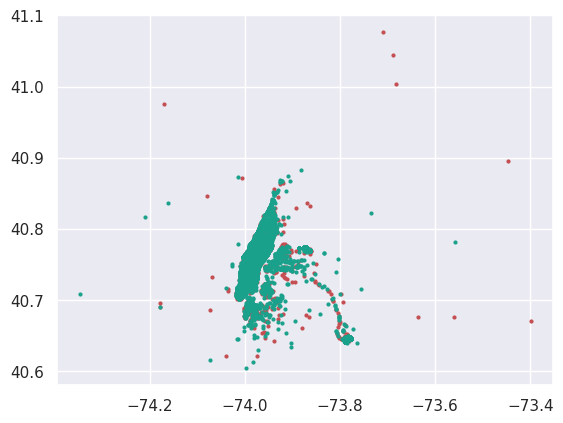

In [ ]:
x1 = df[df['store_and_fwd_flag'] == 'Y']['pickup_longitude']
y1 = df[df['store_and_fwd_flag'] == 'Y']['pickup_latitude']
x2 = df[df['store_and_fwd_flag'] == 'N']['pickup_longitude'][0:20000]
y2 = df[df['store_and_fwd_flag'] == 'N']['pickup_latitude'][0:20000]

fig, ax = plt.subplots()

ax.scatter(x1, y1, c = "r", s = 4)
ax.scatter(x2, y2, c = [[0.1, 0.63, 0.55]], s = 4)
plt.show()

In [ ]:
Q1_lg = df['pickup_longitude'].quantile(0.25)
Q3_lg = df['pickup_longitude'].quantile(0.75)
IQR_lg = Q3_lg - Q1_lg

Q1_la = df['pickup_latitude'].quantile(0.25)
Q3_la = df['pickup_latitude'].quantile(0.75)
IQR_la = Q3_la - Q1_la


mask1 = (df['pickup_longitude'] < Q1_lg - 1.5 * IQR_lg) | (df['pickup_longitude'] > Q3_lg + 1.5 * IQR_lg)
mask2 = (df['pickup_latitude'] < Q1_la - 1.5 * IQR_la)| (df['pickup_latitude'] > Q3_la + 1.5 * IQR_la)
print(f"LONGITUDE BLOWOUTS \n{df[mask1]['store_and_fwd_flag'].value_counts()}", end="\n\n\n")
print(f"LATITUDE BLOWOUTS \n{df[mask2]['store_and_fwd_flag'].value_counts()}", end="\n\n\n")
print(f"LONGITUDE AND LATITUDE BLOWOUTS \n{df[mask1][mask2]['store_and_fwd_flag'].value_counts()}", end="\n\n\n")

LONGITUDE BLOWOUTS 
store_and_fwd_flag
N    83294
Y     1028
Name: count, dtype: int64


LATITUDE BLOWOUTS 
store_and_fwd_flag
N    52144
Y      599
Name: count, dtype: int64


LONGITUDE AND LATITUDE BLOWOUTS 
store_and_fwd_flag
N    34272
Y      468
Name: count, dtype: int64




<ipython-input-46-d3cca83691e5>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"LONGITUDE AND LATITUDE BLOWOUTS \n{df[mask1][mask2]['store_and_fwd_flag'].value_counts()}", end="\n\n\n")


<ipython-input-51-16afe8767020>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  blout_df = df[mask1][mask2]


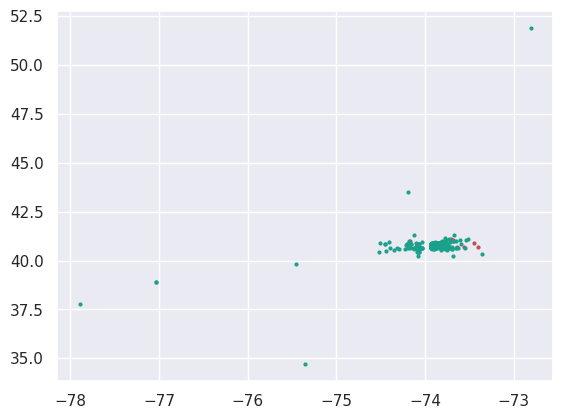

In [ ]:
blout_df = df[mask1][mask2]
mask_Y = blout_df['store_and_fwd_flag'] == 'Y'
mask_N = blout_df['store_and_fwd_flag'] == 'N'
x1 = blout_df[mask_Y]['pickup_longitude']
y1 = blout_df[mask_Y]['pickup_latitude']
x2 = blout_df[mask_N]['pickup_longitude'][0:8000]
y2 = blout_df[mask_N]['pickup_latitude'][0:8000]

fig, ax = plt.subplots()

ax.scatter(x1, y1, c = "r", s = 4)
ax.scatter(x2, y2, c = [[0.1, 0.63, 0.55]], s = 4)
plt.show()